In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* univariate analysis

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

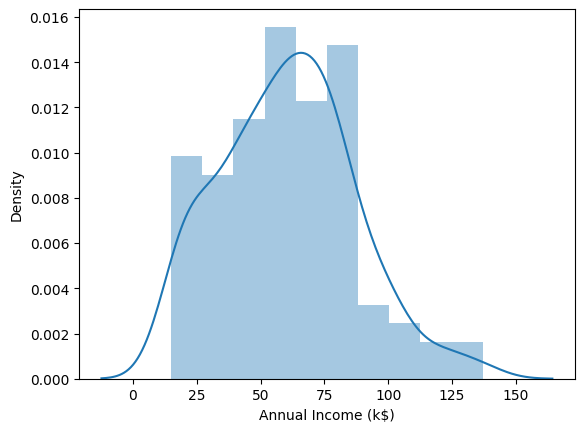

In [ ]:
sns.distplot(df['Annual Income (k$)'])

In [ ]:
df.columns
 

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
  

# Assuming you have a DataFrame named 'df' with the original column names
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)


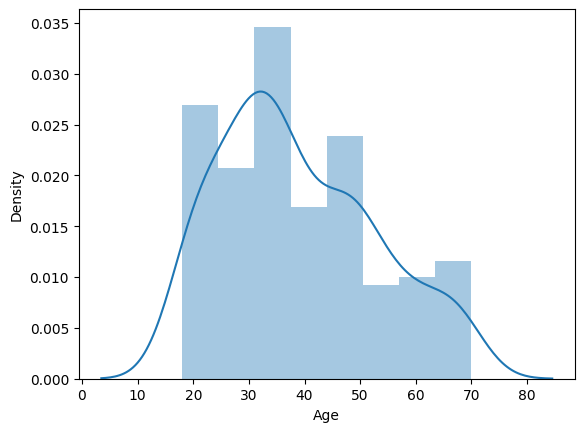

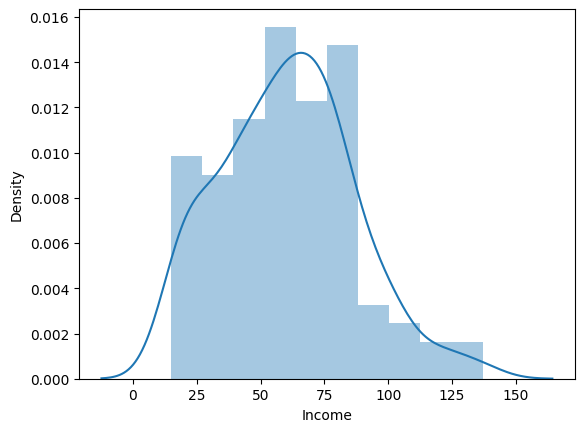

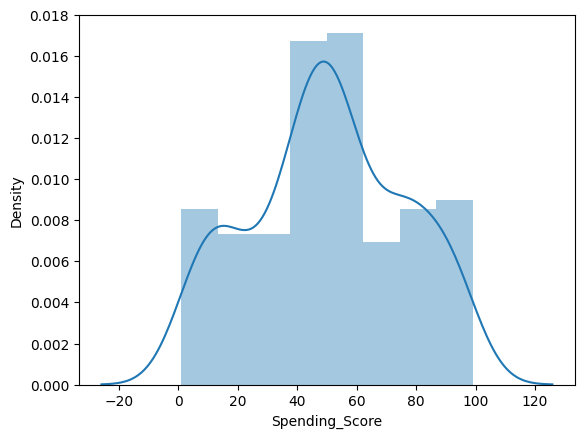

In [ ]:
comulm=[ 'Age', 'Income', 'Spending_Score']

for i in comulm:
    plt.figure()
    sns.distplot(df[i])

In [ ]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


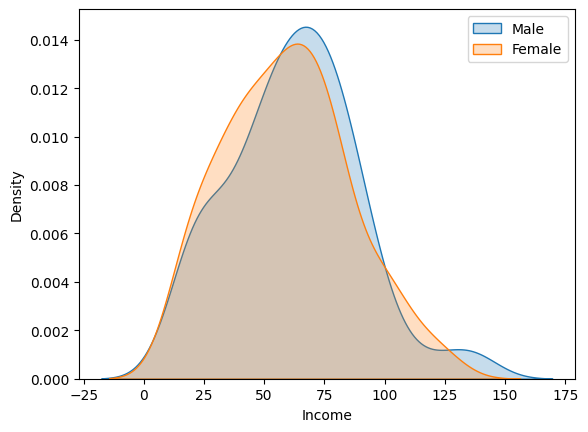

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame 'df' contenant les colonnes 'Income' et 'Gender'

# Divisez les données en fonction de la colonne 'Gender'
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Tracez les graphiques KDE séparément pour chaque catégorie
sns.kdeplot(male_data['Income'], label='Male', shade=True)
sns.kdeplot(female_data['Income'], label='Female', shade=True)

# Affichez la légende
plt.legend()
plt.show()


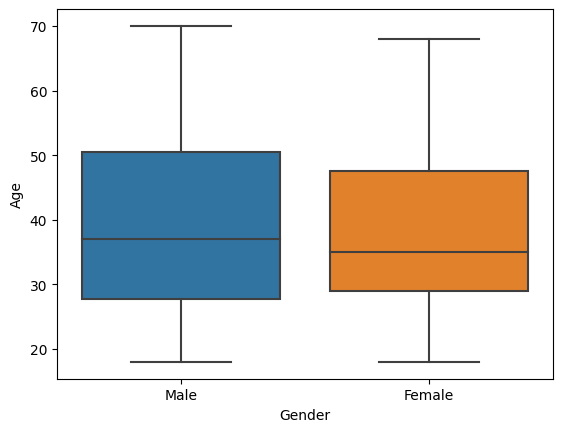

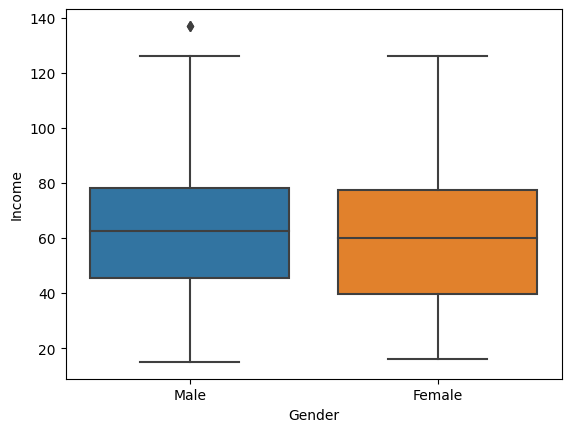

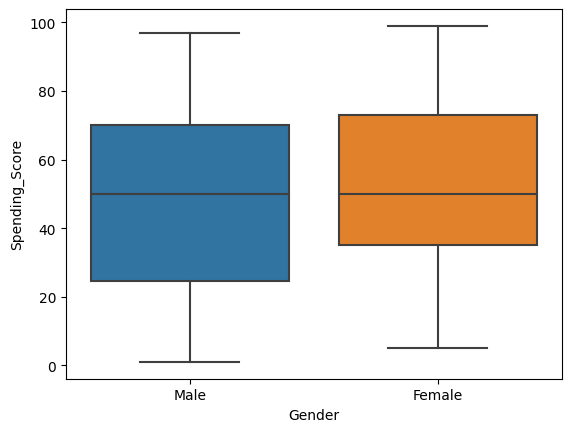

In [ ]:
columns = ['Age', 'Income','Spending_Score']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# bivariate analysis

<Axes: xlabel='Income', ylabel='Spending_Score'>

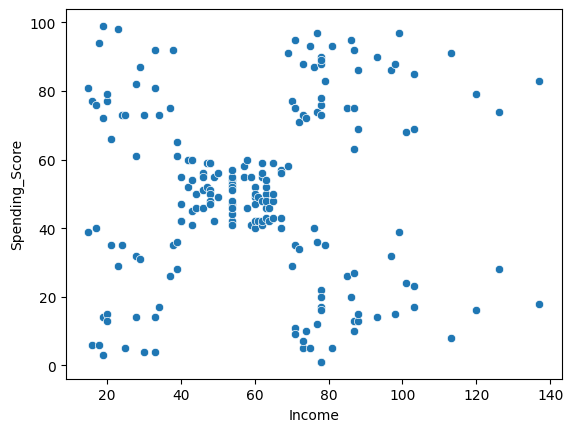

In [ ]:
sns.scatterplot(data=df,x='Income', y='Spending_Score')

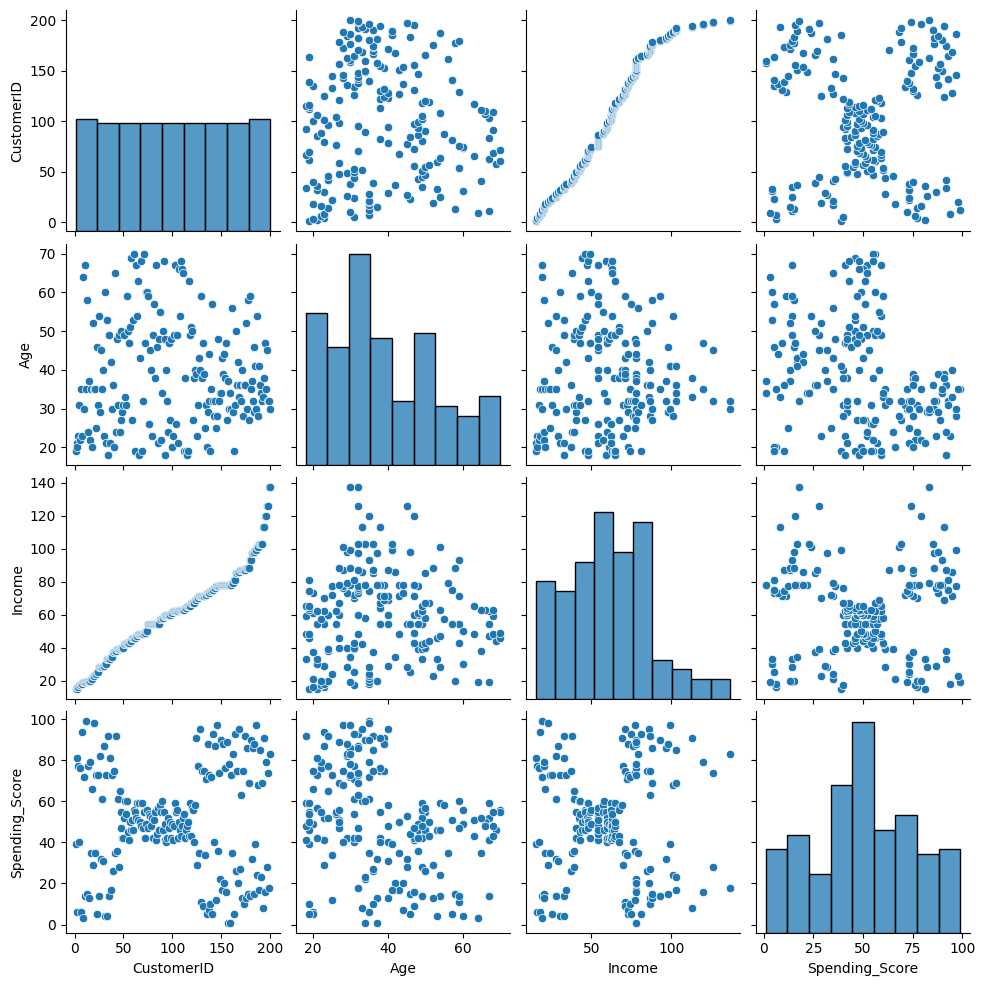

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

In [ ]:
df.drop(columns='CustomerID', axis=1)

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


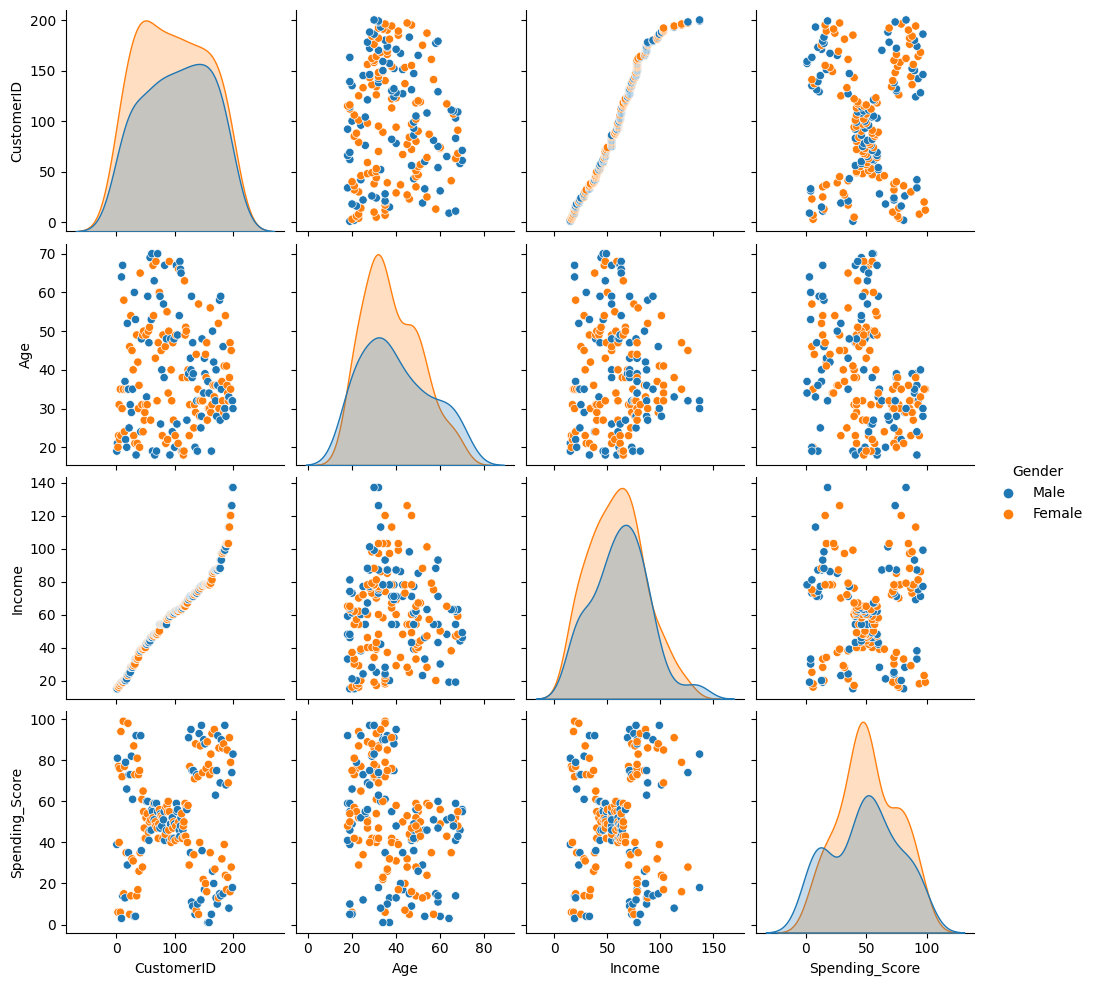

In [ ]:
sns.pairplot(df, hue='Gender')

In [ ]:
# Créer un dictionnaire spécifiant les colonnes et les fonctions d'agrégation
aggregation_functions = {
    'Age': 'mean',
    'Income': 'mean',
    'Spending_Score': 'mean'
}

# Utiliser la méthode groupby avec agg pour obtenir la moyenne des colonnes
result = df.groupby(['Gender']).agg(aggregation_functions)
result


,Age,Income,Spending_Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
import pandas as pd

 

# Sélectionnez uniquement les colonnes numériques pour le calcul de corrélation
numerical_data = df[['Age', 'Income', 'Spending_Score']]

# Calculez la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Affichez la matrice de corrélation
print(correlation_matrix)



                     Age    Income  Spending_Score
Age             1.000000 -0.012398       -0.327227
Income         -0.012398  1.000000        0.009903
Spending_Score -0.327227  0.009903        1.000000


In [ ]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

In [ ]:
# Excluez les colonnes non numériques (par exemple, les noms de pays)
dff = df.select_dtypes(include=[int, float])

 

# Calculez la matrice de corrélation
correlation_matrix = dff.corr()
correlation_matrix

,CustomerID,Age,Income,Spending_Score,Income Cluster
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.149771
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.032273
Income,0.977548,-0.012398,1.000000,0.009903,0.216304
Spending_Score,0.013835,-0.327227,0.009903,1.000000,0.007563
Income Cluster,0.149771,-0.032273,0.216304,0.007563,1.000000


<Axes: >

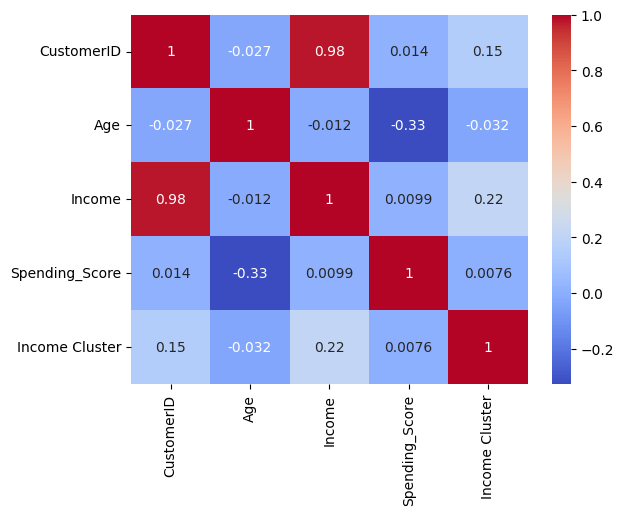

In [100]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


# clean DataFrame (df)

In [ ]:
df = df.drop_duplicates()


In [ ]:
df = df.dropna()



In [ ]:
df=df.reset_index(drop=True)
df

,CustomerID,Gender,Age,Income,Spending_Score,Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


# clustering univariate , bivariate , multivariate


In [ ]:
clustering = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed.


In [ ]:
clustering.fit(df[['Income']])

KMeans(n_clusters=3)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
df['Income Cluster']=clustering.labels_
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [ ]:
df['Income'].value_counts()


Income
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [ ]:
clustering.inertia_

3936.796825396825

In [ ]:
intertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Income']])
    intertia_score.append(kmeans.inertia_)

In [ ]:
intertia_score

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8534.415154553051,
 5050.904761904762,
 3962.5679936006027,
 2822.4996947496948,
 2168.4787157287155,
 1743.4772727272727]

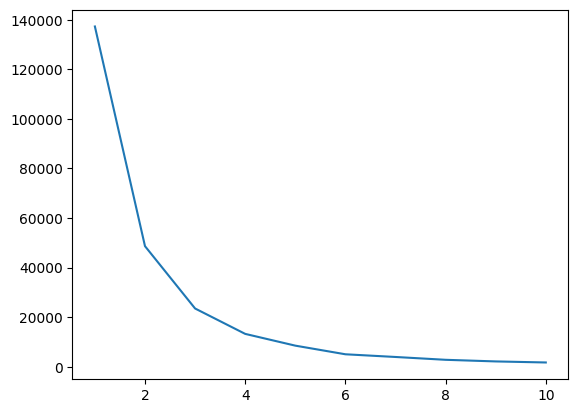

In [ ]:
plt.plot(range(1,11),intertia_score)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score',
       'Income Cluster'],
      dtype='object')

In [ ]:
# Groupage par 'Income Cluster' et calcul de la moyenne pour chaque groupe
result = df.groupby('Income Cluster')[['Age', 'Income', 'Spending_Score']].mean()

# Affichez le résultat
print(result)


                      Age     Income  Spending_Score
Income Cluster                                      
0               39.500000  33.486486       50.229730
1               37.833333  99.888889       50.638889
2               38.722222  67.088889       50.000000


# briariate clustering

In [ ]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Income','Spending_Score']]) 


KMeans(n_clusters=5)

In [ ]:
df['si_cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Income Cluster,si_cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,4


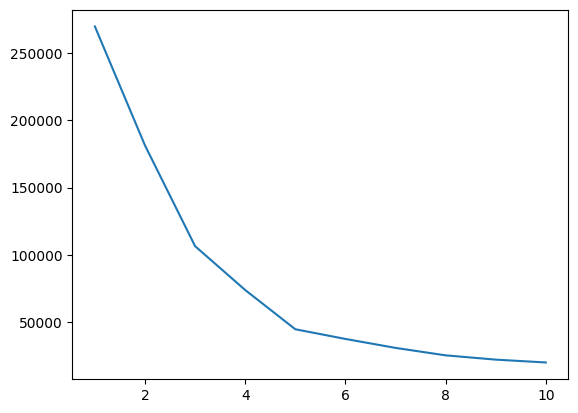

In [ ]:
intertia_score2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Income','Spending_Score']])
    intertia_score2.append(kmeans.inertia_)
    
plt.plot(range(1,11),intertia_score2)

on remarque que ==> k=5

In [ ]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,86.538462,82.128205
1,25.727273,79.363636
2,88.200000,17.114286
3,55.296296,49.518519
4,26.304348,20.913043


<Axes: xlabel='Income', ylabel='Spending_Score'>

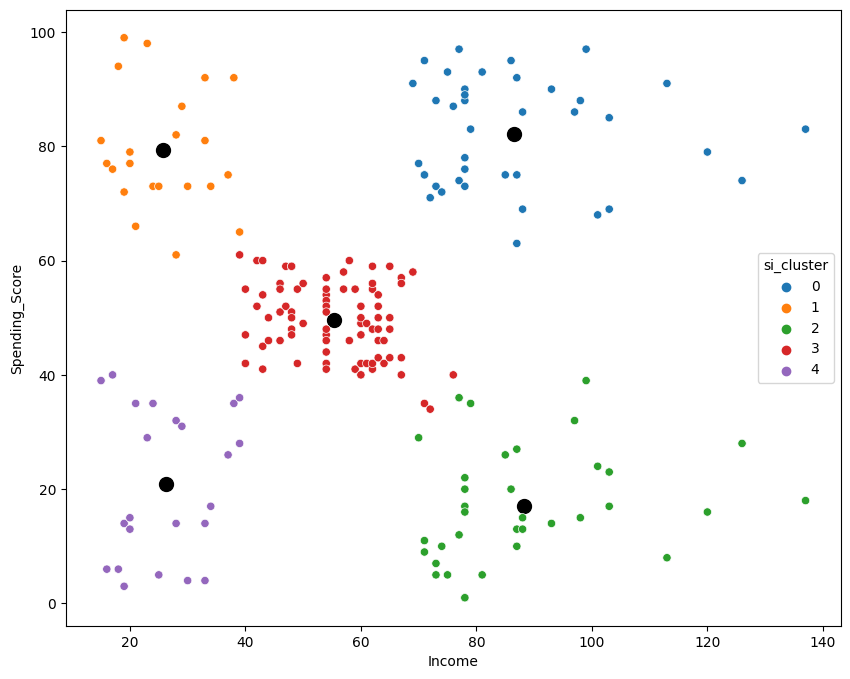

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black')

sns.scatterplot(data=df, x='Income',y='Spending_Score', hue='si_cluster', palette='tab10')

In [77]:
pd.crosstab(df['si_cluster'],df['Gender'],normalize='index')

Gender,Female,Male
si_cluster,,
0,0.538462,0.461538
1,0.590909,0.409091
2,0.457143,0.542857
3,0.592593,0.407407
4,0.608696,0.391304


In [79]:
df.groupby('si_cluster')[['Age', 'Income', 'Spending_Score']].mean()

,Age,Income,Spending_Score
si_cluster,,,
0,32.692308,86.538462,82.128205
1,25.272727,25.727273,79.363636
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


# mulivariate clustering

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scale= StandardScaler()

In [90]:
df2 = pd.get_dummies(df).astype(int)
df2.head()

,CustomerID,Age,Income,Spending_Score,Income Cluster,si_cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,4,0,1
1,2,21,15,81,0,1,0,1
2,3,20,16,6,0,4,1,0
3,4,23,16,77,0,1,1,0
4,5,31,17,40,0,4,1,0


In [92]:
df2.columns

Index(['CustomerID', 'Age', 'Income', 'Spending_Score', 'Income Cluster',
       'si_cluster', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [94]:
df2=df2[[  'Age', 'Income', 'Spending_Score',  
          'Gender_Male']]
df2

,Age,Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [101]:
df2=scale.fit_transform(df2)

In [102]:
df2=pd.DataFrame(scale.fit_transform(df2))
df2

,0,1,2,3,4
0,-1.723412,-1.424569,-1.738999,-0.434801,0.373632
1,-1.706091,-1.281035,-1.738999,1.195704,0.373632
2,-1.688771,-1.352802,-1.700830,-1.715913,0.373632
3,-1.671450,-1.137502,-1.700830,1.040418,0.373632
4,-1.654129,-0.563369,-1.662660,-0.395980,0.373632
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,1.708034
196,1.671450,0.441365,2.497807,-0.861839,1.708034
197,1.688771,-0.491602,2.497807,0.923953,1.708034
198,1.706091,-0.491602,2.917671,-1.250054,1.708034


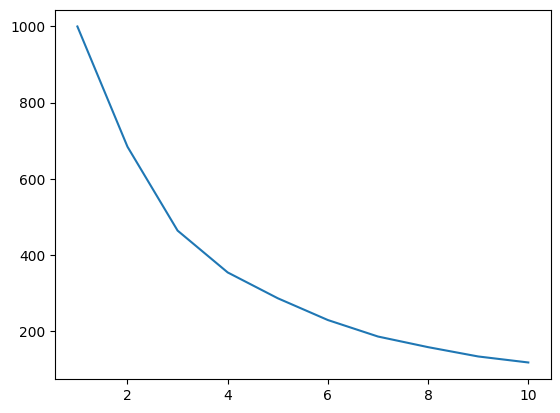

In [103]:
intertia_score3=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    intertia_score3.append(kmeans.inertia_)
    
plt.plot(range(1,11),intertia_score3)

In [ ]:
df.to_csv('resultas_final.csv')